<a href="https://colab.research.google.com/github/lucasdonizete/MetodosNumericos/blob/master/Compara_metodos_Lucas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import numpy.linalg as npla
import time
import matplotlib.pyplot as plt

In [10]:
!git clone https://github.com/lucasdonizete/MetodosNumericos #clonar do Github
%cd MetodosNumericos

Cloning into 'MetodosNumericos'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 57 (delta 28), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (57/57), done.
/content/MetodosNumericos/MetodosNumericos/MetodosNumericos/MetodosNumericos/MetodosNumericos


In [11]:
from GaussPivot import gauss
from GaussSiedel import gauss_seidel
from Gauss_Jacobi import jacobi
from Relaxacao import SOR

/content/MetodosNumericos/GaussSiedel.py:40: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = (f[i]-sum1-sum2)/A[i,i]
/content/MetodosNumericos/GaussSiedel.py:35: RuntimeWarning: invalid value encountered in double_scalars
  sum1 += A[i,j]*x_new[j]
/content/MetodosNumericos/Gauss_Jacobi.py:33: RuntimeWarning: overflow encountered in double_scalars
  xnew[i] = (f[i] - sum)/A[i,i]
/content/MetodosNumericos/Gauss_Jacobi.py:32: RuntimeWarning: overflow encountered in double_scalars
  sum += A[i,j]*x[j]
/content/MetodosNumericos/Relaxacao.py:11: RuntimeWarning: overflow encountered in double_scalars
  x2[i]=(-a[i].dot(x2)+b[i])*w/a[i,i]+x2[i]


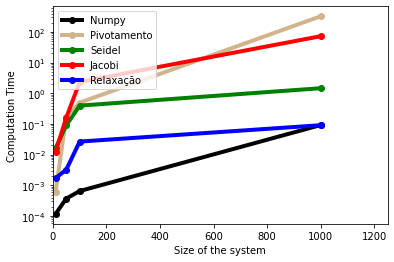

In [12]:
# size of the matrix to be calculated
SIZE = [10,50,100,1000]

# create list
cpu_time_numpy = []
cpu_time_pivot = []
cpu_time_seidel = []
cpu_time_jacobi = []
cpu_time_relax = []


# loop over the size
for size in SIZE :
  # create the system
  A = np.random.rand(size,size)
  f = np.random.rand(size)
  x0=np.ones(size)
  # nummpy
  t0 = time.clock()
  w=npla.solve(A,f)
  cpu_time_numpy.append(time.clock()-t0)

  # Pivotamento
  t0 = time.clock()
  x= gauss(A,f)
  cpu_time_pivot.append(time.clock()-t0)

  # Siedel
  t0 = time.clock()
  x= gauss_seidel(A,f,x0)
  cpu_time_seidel.append(time.clock()-t0)

    # Jacobi
  t0 = time.clock()
  x= jacobi(A,f,x0)
  cpu_time_jacobi.append(time.clock()-t0)

      #SOR
  t0 = time.clock()
  x= SOR(A,f,x0)
  cpu_time_relax.append(time.clock()-t0)


# plot the results
plt.semilogy(SIZE,cpu_time_numpy,'o-',linewidth=4, color='black',label='Numpy')
plt.semilogy(SIZE,cpu_time_pivot,'o-',linewidth=4, color='tan',label='Pivotamento')
plt.semilogy(SIZE,cpu_time_seidel,'o-',linewidth=4, color='green',label='Seidel')
plt.semilogy(SIZE,cpu_time_jacobi,'o-',linewidth=4, color='red',label='Jacobi')
plt.semilogy(SIZE,cpu_time_relax,'o-',linewidth=4, color='blue',label='Relaxação')
plt.xlabel('Size of the system'  )
plt.ylabel('Computation Time')
plt.xlim([0,1250])
plt.legend(loc=2)
plt.show()